In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

In [205]:
#Reading ht csv file
df =pd.read_csv("C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\Data_Analytics\Analytics.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,0.816895,0,1,1,2,1,0.928786,0.631290,1,1
1,51676,0,0.743652,0,0,1,3,0,0.787090,0.427261,2,1
2,31112,1,0.975586,0,1,1,2,0,0.271835,0.532876,2,1
3,60182,0,0.597168,0,0,1,2,1,0.621313,0.578483,3,1
4,1665,0,0.963379,1,0,1,3,0,0.636778,0.328847,2,1


# Selecting Important Features

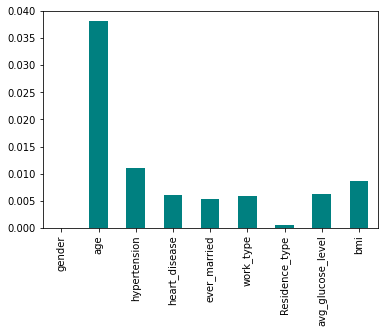

In [206]:
from sklearn.feature_selection import mutual_info_classif

X=df.iloc[:,1:len(df.columns)-2]
y=df['stroke']

importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-2])
feat_imp.plot(kind='bar',color='teal')
plt.show()

# MODEL LOGISTIC REGRESSION

In [207]:
X_LR = df.iloc[:,2:8]
#print(X_LR)

Y_LR = df['stroke']
#print(Y_LR)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, Y_LR, test_size=0.3,random_state=42)

# print(len(y_train_LR))
# print(len(x_train_LR))

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state=0)  
classifier.fit(x_train_LR, y_train_LR)

#PREDICTING THE TEST RESULT  
y_pred_LR = classifier.predict(x_test_LR)
#print(y_pred_LR)


#CREATING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix  
cmatrix = confusion_matrix(y_test_LR,y_pred_LR)  

print(cmatrix)

#Precision
from sklearn.metrics import classification_report
print(classification_report(y_test_LR,y_pred_LR))


[[1444    0]
 [  89    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

# DECISION TREE CLASSIFICATION

In [208]:
# X = df.drop(['Residence_type','ever_married','stroke'],axis=1)
X_dt = df.drop(['ever_married','Residence_type','stroke'],axis=1)
print(X_dt)

Y_dt = df['stroke']
print(Y)

         id  gender       age  hypertension  heart_disease  work_type  \
0      9046       1  0.816895             0              1          2   
1     51676       0  0.743652             0              0          3   
2     31112       1  0.975586             0              1          2   
3     60182       0  0.597168             0              0          2   
4      1665       0  0.963379             1              0          3   
...     ...     ...       ...           ...            ...        ...   
5105  18234       0  0.975586             1              0          2   
5106  44873       0  0.987793             0              0          3   
5107  19723       0  0.426270             0              0          3   
5108  37544       1  0.621582             0              0          2   
5109  44679       0  0.536133             0              0          0   

      avg_glucose_level       bmi  smoking_status  
0              0.928786  0.631290               1  
1              0.78

# TRAIN TEST SPLIT

In [224]:
from sklearn.model_selection import train_test_split

x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.3,random_state=0)
print(len(x_train_dt))
print(len(x_test_dt))

3577
1533


# VALIDATION DATA

In [225]:
x_train_new_dt, x_val_dt, y_train_new_dt, y_val_dt = train_test_split(x_train_dt, y_train_dt, test_size=0.3,random_state=0)
print(len(x_train_new_dt))
print(len(x_val_dt))
print(len(x_test_dt))

2503
1074
1533


In [217]:
x_val_dt

,id,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
1183,13602,1,0.890137,1,0,3,0.251179,0.427261,0
4019,52838,1,0.157715,0,0,4,0.020013,0.158423,2
281,45222,1,0.707031,1,0,2,0.003532,0.412859,3
4678,55545,0,0.804688,0,0,3,0.105737,0.535276,2
152,32503,0,0.975586,0,0,3,0.114781,0.571282,2
...,...,...,...,...,...,...,...,...,...
3414,60249,1,0.157715,0,0,2,0.460032,0.328847,0
2095,4635,0,0.829102,0,0,2,0.229240,0.504072,2
2511,35893,1,0.340820,0,0,2,0.325880,0.631290,1
2073,49615,0,0.145508,0,0,4,0.016160,0.264038,2


# TRAINING

In [212]:
from sklearn.tree import DecisionTreeClassifier  
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0)  
DT_model.fit(x_train_dt, y_train_dt)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

# TESTING

In [221]:
#Predicting the test set result  
y_pred_dt= DT_model.predict(x_test_dt)
print(len(y_pred_dt))
print(len(y_val_dt))

1533
1074


# CREATING CONFUSION MATRIX

In [214]:
from sklearn.metrics import confusion_matrix,f1_score  
cmatrix = confusion_matrix(y_test_dt,y_pred_dt)
print(cmatrix)
f1_score = (y_test_dt,y_pred_dt)

[[1390   67]
 [  70    6]]


In [215]:
from sklearn.metrics import accuracy_score 
score1 = accuracy_score(y_val_dt,y_pred_dt)
print(score1)

ValueError: Found input variables with inconsistent numbers of samples: [1074, 1533]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dt,y_pred_dt))

# Hyperparameters Tuning

In [ ]:
param_list = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DT_model, param_grid=param_list, cv=10)

In [ ]:
grid.fit(x_train_dt, y_train_dt)

In [ ]:
#Best score obtained from hyperparameter tuning
grid.best_score_

In [ ]:
#Best parameter obtained from hyperparameter tuning
grid.best_params_['criterion']

# PICKLE FILE CREATION

In [ ]:
import pickle

with open('tuned_model.pkl','wb') as files:
    pickle.dump(grid,files)


In [ ]:
pickled_model = pickle.load(open('tuned_model.pkl','rb'))
pred = pickled_model.predict(x_test_dt)
pred

In [ ]:
score = pickled_model.score(x_test_dt,y_test_dt)
print(score)

# VALIDATION SET ALONG WITH PREDICTED VALUES


In [ ]:
# prediction = grid.predict(x_val_dt)
# prediction
